In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [3]:
# Reading the dataset
filename = "C:/Users/jyots/Desktop/jyots/datawarehouse/data/Dataset_Churning.txt"
churnDF = pd.read_csv(filename, sep=',', decimal='.',header = 0).drop('Area Code', 1).drop('Phone', 1).drop('State',1)
churnDF = churnDF.rename(columns={'Churn?': 'Churn'})
churnDF.head(10)

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,118,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,121,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,147,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,117,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,141,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [4]:
cat_to_num = {"Int'l Plan": {"yes": 1, "no": 0},
              "Churn": {"True.": 1, "False.": 0},
              "VMail Plan": {"yes": 1, "no": 0}}

churnDF.replace(cat_to_num, inplace=True)
churnDF.head(10)

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,118,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,121,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,147,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,117,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,141,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


In [5]:
# We need to copy else you will receive a copy warning when adding the cluster column
trainDF, testDF = train_test_split(churnDF.copy(deep=True), test_size=0.2)
trainDF.head(10)

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
2929,71,0,0,0,185.0,84,31.45,232.5,129,19.76,191.1,82,8.60,14.9,4,4.02,3,0
3172,41,0,0,0,223.8,67,38.05,244.8,74,20.81,223.8,156,10.07,12.3,5,3.32,3,0
2262,154,0,1,35,64.9,76,11.03,184.1,91,15.65,151.6,75,6.82,14.6,1,3.94,1,0
761,27,0,0,0,201.2,128,34.20,227.2,100,19.31,145.8,91,6.56,8.4,3,2.27,2,0
613,105,1,1,29,220.7,82,37.52,217.7,110,18.50,190.5,100,8.57,13.2,6,3.56,1,1
662,63,0,0,0,211.2,80,35.90,237.7,93,20.20,259.2,58,11.66,12.3,2,3.32,0,0
2591,122,0,0,0,231.2,141,39.30,267.8,136,22.76,240.3,100,10.81,8.8,5,2.38,1,1
1776,62,0,0,0,172.4,132,29.31,230.5,100,19.59,228.2,109,10.27,11.0,5,2.97,0,0
1759,66,0,1,35,190.8,100,32.44,261.3,93,22.21,209.5,108,9.43,8.9,6,2.40,0,0
2008,86,0,1,33,253.1,112,43.03,210.1,94,17.86,95.0,98,4.27,11.9,4,3.21,3,0


In [6]:
cluster = KMeans(n_clusters=4)
trainDF["cluster"]=cluster.fit_predict(trainDF)
trainDF.head(10)

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn,cluster
2929,71,0,0,0,185.0,84,31.45,232.5,129,19.76,191.1,82,8.60,14.9,4,4.02,3,0,1
3172,41,0,0,0,223.8,67,38.05,244.8,74,20.81,223.8,156,10.07,12.3,5,3.32,3,0,0
2262,154,0,1,35,64.9,76,11.03,184.1,91,15.65,151.6,75,6.82,14.6,1,3.94,1,0,2
761,27,0,0,0,201.2,128,34.20,227.2,100,19.31,145.8,91,6.56,8.4,3,2.27,2,0,3
613,105,1,1,29,220.7,82,37.52,217.7,110,18.50,190.5,100,8.57,13.2,6,3.56,1,1,3
662,63,0,0,0,211.2,80,35.90,237.7,93,20.20,259.2,58,11.66,12.3,2,3.32,0,0,0
2591,122,0,0,0,231.2,141,39.30,267.8,136,22.76,240.3,100,10.81,8.8,5,2.38,1,1,0
1776,62,0,0,0,172.4,132,29.31,230.5,100,19.59,228.2,109,10.27,11.0,5,2.97,0,0,0
1759,66,0,1,35,190.8,100,32.44,261.3,93,22.21,209.5,108,9.43,8.9,6,2.40,0,0,1
2008,86,0,1,33,253.1,112,43.03,210.1,94,17.86,95.0,98,4.27,11.9,4,3.21,3,0,3


In [7]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(trainDF.drop('cluster', 1))
print (kmeans.labels_)

[0 3 0 ..., 1 0 2]


In [8]:
trainDF["cluster"]=cluster.labels_
trainDF.head(10)

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn,cluster
2929,71,0,0,0,185.0,84,31.45,232.5,129,19.76,191.1,82,8.60,14.9,4,4.02,3,0,1
3172,41,0,0,0,223.8,67,38.05,244.8,74,20.81,223.8,156,10.07,12.3,5,3.32,3,0,0
2262,154,0,1,35,64.9,76,11.03,184.1,91,15.65,151.6,75,6.82,14.6,1,3.94,1,0,2
761,27,0,0,0,201.2,128,34.20,227.2,100,19.31,145.8,91,6.56,8.4,3,2.27,2,0,3
613,105,1,1,29,220.7,82,37.52,217.7,110,18.50,190.5,100,8.57,13.2,6,3.56,1,1,3
662,63,0,0,0,211.2,80,35.90,237.7,93,20.20,259.2,58,11.66,12.3,2,3.32,0,0,0
2591,122,0,0,0,231.2,141,39.30,267.8,136,22.76,240.3,100,10.81,8.8,5,2.38,1,1,0
1776,62,0,0,0,172.4,132,29.31,230.5,100,19.59,228.2,109,10.27,11.0,5,2.97,0,0,0
1759,66,0,1,35,190.8,100,32.44,261.3,93,22.21,209.5,108,9.43,8.9,6,2.40,0,0,1
2008,86,0,1,33,253.1,112,43.03,210.1,94,17.86,95.0,98,4.27,11.9,4,3.21,3,0,3


In [9]:
print (kmeans.cluster_centers_)

[[  1.00480183e+02   8.99390244e-02   2.74390244e-01   7.72560976e+00
    1.44213110e+02   9.90365854e+01   2.45168598e+01   2.45977896e+02
    9.93765244e+01   2.09083537e+01   1.73774238e+02   9.95167683e+01
    7.81981707e+00   1.02984756e+01   4.54115854e+00   2.78109756e+00
    1.52743902e+00   9.60365854e-02]
 [  1.04866667e+02   9.26829268e-02   2.69918699e-01   7.75609756e+00
    1.64428618e+02   1.01647154e+02   2.79533496e+01   1.47561301e+02
    1.00705691e+02   1.25429431e+01   1.73618374e+02   1.00175610e+02
    7.81302439e+00   1.01912195e+01   4.46504065e+00   2.75224390e+00
    1.59024390e+00   1.00813008e-01]
 [  9.80397059e+01   7.64705882e-02   2.72058824e-01   8.08382353e+00
    1.62145588e+02   1.00063235e+02   2.75653088e+01   1.96504118e+02
    9.92029412e+01   1.67031029e+01   2.56605882e+02   9.96720588e+01
    1.15473971e+01   1.02820588e+01   4.39558824e+00   2.77652941e+00
    1.50000000e+00   8.97058824e-02]
 [  1.02390210e+02   1.21678322e-01   2.74125874e

In [10]:
trainDF[trainDF.cluster == 1]

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn,cluster
2929,71,0,0,0,185.0,84,31.45,232.5,129,19.76,191.1,82,8.60,14.9,4,4.02,3,0,1
1759,66,0,1,35,190.8,100,32.44,261.3,93,22.21,209.5,108,9.43,8.9,6,2.40,0,0,1
140,110,0,0,0,148.5,115,25.25,276.4,84,23.49,193.6,112,8.71,12.4,3,3.35,1,0,1
1269,55,0,1,45,130.5,114,22.19,208.4,94,17.71,141.6,114,6.37,11.0,5,2.97,4,1,1
3219,150,0,1,35,139.6,72,23.73,332.8,170,28.29,213.8,105,9.62,8.8,2,2.38,2,0,1
1270,74,0,0,0,162.7,102,27.66,292.0,105,24.82,183.3,80,8.25,8.7,6,2.35,0,0,1
1383,72,0,1,21,138.1,113,23.48,260.1,83,22.11,135.4,118,6.09,8.2,2,2.21,2,0,1
2755,107,0,0,0,206.9,79,35.17,262.4,117,22.30,149.3,69,6.72,10.7,3,2.89,0,0,1
2045,56,0,0,0,222.7,133,37.86,277.0,89,23.55,101.8,94,4.58,13.6,4,3.67,4,0,1
3216,221,0,1,24,180.5,85,30.69,224.1,92,19.05,205.7,103,9.26,2.4,3,0.65,0,0,1


In [11]:
testDF.head(10)

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
925,43,0,0,0,84.2,134,14.31,80.8,103,6.87,196.1,79,8.82,10.8,2,2.92,1,0
3308,45,0,0,0,211.3,87,35.92,165.7,97,14.08,265.9,72,11.97,13.3,6,3.59,1,0
2807,52,0,0,0,217.0,104,36.89,152.3,83,12.95,134.3,109,6.04,11.8,4,3.19,2,0
3089,70,0,1,30,143.4,72,24.38,170.0,92,14.45,127.9,68,5.76,9.4,4,2.54,3,0
1288,56,0,0,0,253.2,95,43.04,188.0,116,15.98,142.0,133,6.39,4.4,4,1.19,1,0
2605,147,0,1,38,243.4,126,41.38,273.8,109,23.27,282.9,91,12.73,14.1,8,3.81,2,0
2212,8,0,1,36,242.9,67,41.29,170.9,59,14.53,177.3,130,7.98,4.8,12,1.30,1,0
1949,73,0,0,0,157.1,109,26.71,268.8,83,22.85,181.5,91,8.17,10.0,8,2.70,0,0
2245,65,0,1,29,215.5,129,36.64,161.9,77,13.76,128.3,91,5.77,8.8,5,2.38,2,0
1060,124,0,0,0,193.0,97,32.81,89.8,99,7.63,172.8,104,7.78,15.3,3,4.13,1,0


In [12]:
cValues = kmeans.predict(testDF)
testDF['cluster'] = cValues
testDF.head(10)

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn,cluster
925,43,0,0,0,84.2,134,14.31,80.8,103,6.87,196.1,79,8.82,10.8,2,2.92,1,0,1
3308,45,0,0,0,211.3,87,35.92,165.7,97,14.08,265.9,72,11.97,13.3,6,3.59,1,0,2
2807,52,0,0,0,217.0,104,36.89,152.3,83,12.95,134.3,109,6.04,11.8,4,3.19,2,0,1
3089,70,0,1,30,143.4,72,24.38,170.0,92,14.45,127.9,68,5.76,9.4,4,2.54,3,0,1
1288,56,0,0,0,253.2,95,43.04,188.0,116,15.98,142.0,133,6.39,4.4,4,1.19,1,0,3
2605,147,0,1,38,243.4,126,41.38,273.8,109,23.27,282.9,91,12.73,14.1,8,3.81,2,0,3
2212,8,0,1,36,242.9,67,41.29,170.9,59,14.53,177.3,130,7.98,4.8,12,1.30,1,0,3
1949,73,0,0,0,157.1,109,26.71,268.8,83,22.85,181.5,91,8.17,10.0,8,2.70,0,0,0
2245,65,0,1,29,215.5,129,36.64,161.9,77,13.76,128.3,91,5.77,8.8,5,2.38,2,0,1
1060,124,0,0,0,193.0,97,32.81,89.8,99,7.63,172.8,104,7.78,15.3,3,4.13,1,0,1


In [13]:
print(kmeans.fit_transform(testDF))

[[ 212.21530381  167.35857754  119.46636042  203.40151527]
 [  90.46194593  148.25393058  100.71440282  135.62602922]
 [ 145.49815788  140.92373883  113.77186891   75.06810519]
 ..., 
 [ 113.9165737    32.86877643   96.42221898  111.91960245]
 [  89.9457842    91.02858977  125.14658476   79.85976336]
 [  91.92854786  101.46115228   83.5160035   115.17258213]]


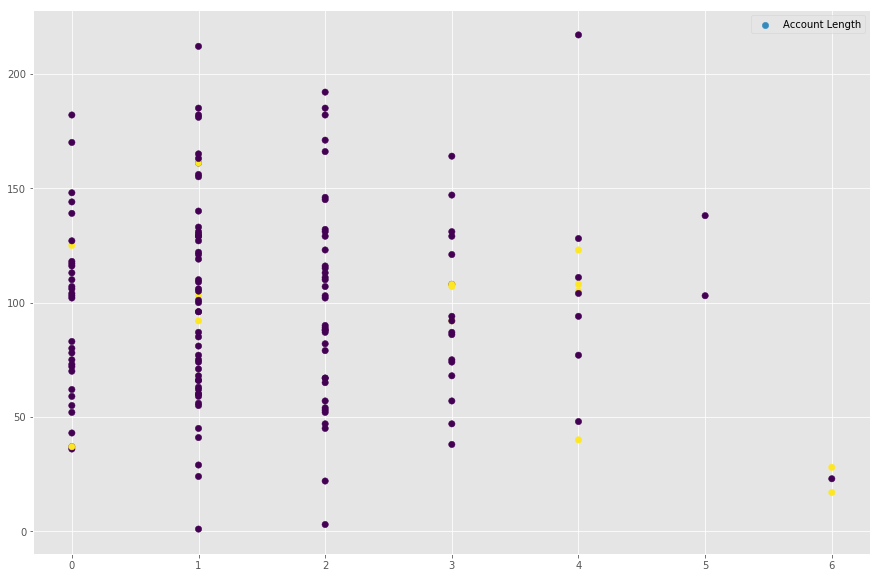

In [15]:
clt1DF=testDF[testDF.cluster == 2]
plt.figure(figsize=(15, 10))
plt.scatter(clt1DF['CustServ Calls'],clt1DF['Account Length'],c=clt1DF['Churn'],s=40)
plt.legend()
plt.show()

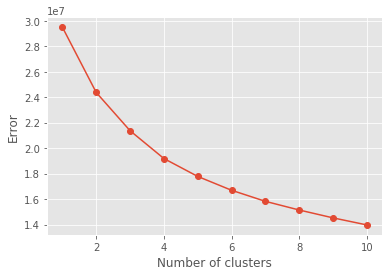

In [16]:
error = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(trainDF.drop('cluster', 1))
    error.append(km.inertia_)
plt.plot(range(1,11), error, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.show()

In [17]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage

clusters = linkage(pdist(churnDF, metric='euclidean'), method='complete')

In [18]:
hierarchicalDF = pd.DataFrame(clusters, columns=['label 1','label 2','distance','#Elements'], index=['cluster %d' %(i+1) for i in range(clusters.shape[0])])
hierarchicalDF.head(100)

,label 1,label 2,distance,#Elements
cluster 1,1968.0,2617.0,13.047368,2.0
cluster 2,2205.0,3018.0,14.455705,2.0
cluster 3,1219.0,2171.0,14.991441,2.0
cluster 4,772.0,1599.0,15.108425,2.0
cluster 5,1638.0,2748.0,15.234937,2.0
cluster 6,1784.0,2518.0,15.477148,2.0
cluster 7,1457.0,2828.0,15.494870,2.0
cluster 8,2120.0,3248.0,15.710236,2.0
cluster 9,1033.0,2481.0,15.968475,2.0
cluster 10,1075.0,1401.0,16.080967,2.0


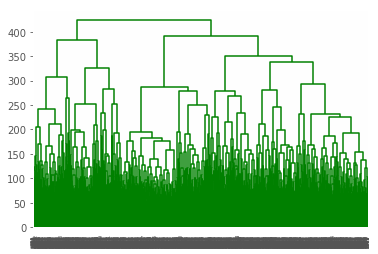

In [19]:
from scipy.cluster.hierarchy import dendrogram
%matplotlib inline

dendrogram = dendrogram(hierarchicalDF, color_threshold=np.inf)